**Importing the Require Packages**

In [ ]:
pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import cv2
# import face_recognition as fr
import cvlib as cv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.utils import img_to_array,array_to_img
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


**Dataset Labels**

In [ ]:
stu_label=np.load('/content/drive/MyDrive/Students_lables/stu_names.npz')
stu_label=stu_label.f.arr_0


In [ ]:
for subd in stu_label:
  print(subd)

MD Zunnurain
Salman Faizi
Ayub Alam
Pratap Singha
Sayak Mandal
D Omkar Murty
Rajkumar Maity
Rajkumar Roy
Raja Chowdhury
Ayan Pramanik
Sudipta Saha
Subarna Das
Wrishav Sett
Subhadip Samanta
Srikanta Pramanik
Yuvraj Singh Negi
Subhadeep Ghose
Sumit Jana
Subhajit Paul


**Face Recognization on images**

In [ ]:
x=np.zeros((4791,160,160,3))
y=np.zeros((4791))
stu_label_set0=[]

In [ ]:
path=r'/content/drive/MyDrive/Dataset_DA_AI_Stu_Set2-3/DA_AI_ALL_Frame_set0'

count, clas = 0, 0
for stu in stu_label:
    for images in os.listdir(path+"/"+stu):
        if (images.endswith(".jpg")):
            img = cv2.imread(path+"/"+stu+"/"+images)
            face, confidence=cv.detect_face(img)
            for idx,f in enumerate(face):
              (startx,starty)=f[0],f[1]
              (endx,endy)=f[2],f[3]
              crop_face=np.copy(img[starty:endy,startx:endx])
              if(crop_face.shape[0])<10 or (crop_face.shape[1])<10:
                continue
            crop_face = cv2.resize(crop_face, (160, 160))
            # crop_face=img_to_array(crop_face)
            x[count]=crop_face
            y[count] = clas
            count += 1
            print(count)
    
    stu_label_set0.append(stu)
    clas+=1




In [ ]:
count

4791

**Importing the Dataset from google drive**

In [ ]:
path='/content/drive/MyDrive/DATASET_DA_AI_V3/set2'
x=np.load(path+'/x_160_cv.npz')
x=x.f.arr_0

y=np.load(path+'/y_160_cv.npz')
y=y.f.arr_0

# stu_label=np.load(path+'/label_v2_s2.npz')
# stu_label=stu_label.f.arr_0
10600,128,128,3
10800,1

**Deleting some faces from the dataset**

In [ ]:

#delete the image of half of omkar and sayak face image from the dataset as well label
count=0
for i in range(1180,1408):
  if(y[i]==5):
    x=np.delete(x,i,0)
    y=np.delete(y,i,0)
    i+=2
    count+=1
    print(i)
print(count) 

In [ ]:
y_train.shape

(3586, 19)

**Saving the new dataset into google drive**

In [ ]:
path='/content/drive/MyDrive/DATASET_DA_AI_V3/V1_set3_less_OandS'
np.savez_compressed(path+'/x_160_cv',x)
np.savez_compressed(path+'/y_160_cv',y)


**Spliting the dataset into X_train , X_test, Y_train,Y_test**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train=x_train.astype(np.float32) / 255.0
x_test=x_test.astype(np.float32) / 255.0
y_train=keras.utils.to_categorical(y_train,num_classes=19)
y_test=keras.utils.to_categorical(y_test,num_classes=19)

**Image Augmentation Part**

In [ ]:


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomContrast(factor=[0.2,2.2]),
    layers.experimental.preprocessing.RandomTranslation(height_factor=[-0.15,0.3], width_factor=[-0.15,0.3], fill_mode="constant", interpolation='bilinear',fill_value=255),
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(160,160,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)



Checking the **faces** in the dataset

In [ ]:
def get_pic(x,y,index):
  plt.imshow(x[index])
  plt.show()
  l=np.argmax(y[index])
  print("Student name: ",stu_label[int(l)])

for i in range(500,1050,5):
  get_pic(x_train,y_train,i)

**Checking the images after Aplying Image Augmentation**

In [ ]:

plt.axis('off')
plt.imshow(data_augmentation(im_train[0]))

**Row Model Bulding**

In [ ]:
##

**Implementing Transfer Learning**

In [ ]:
from keras.applications.vgg16 import VGG16
input_size=[160,160,3]
vgg=VGG16(input_shape=input_size,weights='imagenet',include_top=False)
for layer in vgg.layers:
  layer.trainable=False
x=Flatten()(vgg.output)
prediction=Dense(19,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


**Importing the pre Trained Model**

In [ ]:
model=load_model('/content/drive/MyDrive/DATASET_DA_AI_V2/DB_V2_set1_V9')
# model.summary()

**Training the Model**

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=2)

Epoch 1/2
118/118 [==============================] - 22s 105ms/step - loss: 0.0182 - accuracy: 0.9957 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2/2
118/118 [==============================] - 10s 88ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 3.0295e-04 - val_accuracy: 1.0000


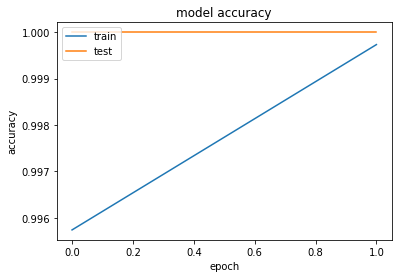

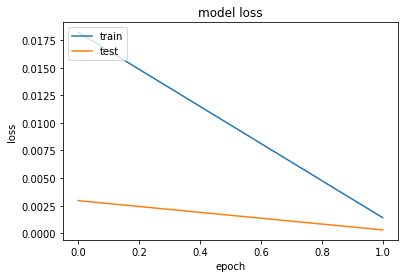

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Testing the model on Test Dataset**

In [ ]:
model.evaluate(x_train,y_train)

131/131 [==============================] - 11s 87ms/step - loss: 2.4749e-04 - accuracy: 1.0000


[0.0002474871289450675, 1.0]

**Saving the Trained Model**

In [ ]:
model.save('DB_V2_set12_model_V10')

In [ ]:
import glob

**Testing the Model on Row images**

In [ ]:
img_list=glob.iglob('/content/drive/MyDrive/prediction_sanp_image/*')
for path in img_list:  
  img=cv2.imread(path)
  face, confidence=cv.detect_face(img)
  for idx,f in enumerate(face):
          (startx,starty)=f[0],f[1]
          (endx,endy)=f[2],f[3]
          crop_face=np.copy(img[starty:endy,startx:endx])
          if(crop_face.shape[0])<10 or (crop_face.shape[1])<10:
              continue
  crop_face = cv2.resize(crop_face, (160, 160)).astype(np.float32) / 255.0
          # crop_face=img_to_array(crop_face)
  crop_face2 = np.expand_dims(crop_face, 0)
          #prediction one th face image
  out=model.predict(crop_face2)[0]
  stu_name=stu_label[np.argmax(out*100)]
  acc=np.max(out)
  acc=round(acc*100,2)
  plt.imshow(crop_face)
  plt.show()
  print(stu_name+" with acc: ",acc)

In [ ]:
get_pic(x_test,y_test,133)